In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


In [2]:
customers = pd.read_csv("customers.csv")
accounts = pd.read_csv("accounts.csv")
linkage = pd.read_csv("customer_account_linkage.csv")
products = pd.read_csv("product_details.csv")
labels = pd.read_csv("train_labels.csv")
test_accounts = pd.read_csv("test_accounts.csv")


In [3]:
transactions = pd.concat(
    [pd.read_csv(f"transactions_part_{i}.csv") for i in range(6)],
    ignore_index=True
)

print("Transactions Shape:", transactions.shape)


Transactions Shape: (7424845, 8)


In [4]:
datasets = {
    "customers": customers,
    "accounts": accounts,
    "linkage": linkage,
    "products": products,
    "labels": labels,
    "transactions": transactions
}

for name, df in datasets.items():
    print(f"\n{name.upper()}")
    print(df.shape)
    display(df.head())



CUSTOMERS
(39988, 14)


,customer_id,date_of_birth,relationship_start_date,pan_available,aadhaar_available,passport_available,mobile_banking_flag,internet_banking_flag,atm_card_flag,demat_flag,credit_card_flag,fastag_flag,customer_pin,permanent_pin
0,CUST_000001,1992-12-26,2008-04-09,Y,Y,N,Y,Y,Y,N,Y,N,613004,613004
1,CUST_000006,1950-05-01,2005-08-01,Y,Y,N,Y,N,Y,N,N,Y,400106,400106
2,CUST_000041,1992-01-01,2013-11-22,NaN,N,N,Y,Y,N,N,N,N,700152,700152
3,CUST_000051,1957-01-25,2020-08-12,NaN,Y,N,N,Y,N,N,N,N,400102,380012
4,CUST_000059,1987-05-08,2023-10-17,Y,Y,Y,N,Y,Y,N,N,N,121012,121012



ACCOUNTS
(40038, 22)


,account_id,account_status,product_code,currency_code,account_opening_date,branch_code,branch_pin,avg_balance,product_family,nomination_flag,cheque_allowed,cheque_availed,num_chequebooks,last_mobile_update_date,kyc_compliant,last_kyc_date,rural_branch,monthly_avg_balance,quarterly_avg_balance,daily_avg_balance,freeze_date,unfreeze_date
0,ACCT_000001,active,100,1,2023-04-25,8229,613004.0,1526.01,S,N,Y,N,0,NaN,N,2022-04-13,N,1663.31,1830.69,1950.13,NaN,NaN
1,ACCT_000006,active,1133,1,2021-07-01,6076,400106.0,-1048.82,O,N,N,N,0,NaN,Y,2022-04-12,N,-910.01,-1136.48,-1208.54,NaN,NaN
2,ACCT_000041,active,100,1,2023-07-26,3756,110128.0,0.00,S,N,Y,N,0,NaN,Y,2023-02-07,N,0.00,0.00,0.00,NaN,NaN
3,ACCT_000051,active,100,1,2021-11-01,1571,400102.0,7338.07,S,Y,Y,Y,2,NaN,Y,2024-05-02,N,6726.84,5549.71,8654.54,NaN,NaN
4,ACCT_000059,active,169,1,2023-04-15,8585,121012.0,12472.12,S,Y,Y,Y,0,NaN,Y,2025-01-12,N,14583.24,9026.30,15780.59,NaN,NaN



LINKAGE
(40038, 2)


,customer_id,account_id
0,CUST_000001,ACCT_000001
1,CUST_000006,ACCT_000006
2,CUST_000041,ACCT_000041
3,CUST_000051,ACCT_000051
4,CUST_000059,ACCT_000059



PRODUCTS
(39988, 11)


,customer_id,loan_sum,loan_count,cc_sum,cc_count,od_sum,od_count,ka_sum,ka_count,sa_sum,sa_count
0,CUST_000001,NaN,0,-75964.52,1,0.00,0,0.0,0,1526.01,1
1,CUST_000006,NaN,0,NaN,0,-52331.47,1,0.0,0,0.00,0
2,CUST_000041,NaN,0,NaN,0,0.00,0,0.0,0,0.00,1
3,CUST_000051,NaN,0,NaN,0,0.00,0,0.0,0,7338.07,1
4,CUST_000059,NaN,0,NaN,0,0.00,0,0.0,0,12472.12,1



LABELS
(24023, 5)


,account_id,is_mule,mule_flag_date,alert_reason,flagged_by_branch
0,ACCT_023272,0,NaN,NaN,NaN
1,ACCT_062177,0,NaN,NaN,NaN
2,ACCT_194388,0,NaN,NaN,NaN
3,ACCT_064626,0,NaN,NaN,NaN
4,ACCT_063119,0,NaN,NaN,NaN



TRANSACTIONS
(7424845, 8)


,transaction_id,account_id,transaction_timestamp,mcc_code,channel,amount,txn_type,counterparty_id
0,TXN_32358649,ACCT_177174,2020-07-01T00:10:03,5651,END,18000.00,D,CP_005826
1,TXN_15222199,ACCT_082915,2020-07-01T00:24:11,9355,IPM,15306.22,D,CP_071766
2,TXN_15349994,ACCT_083481,2020-07-01T00:38:08,6501,UPD,1000.00,C,CP_004566
3,TXN_23310072,ACCT_127055,2020-07-01T00:44:40,5682,UPD,115.35,D,CP_089420
4,TXN_20310644,ACCT_110269,2020-07-01T00:57:20,9384,IPM,8562.19,D,CP_032031


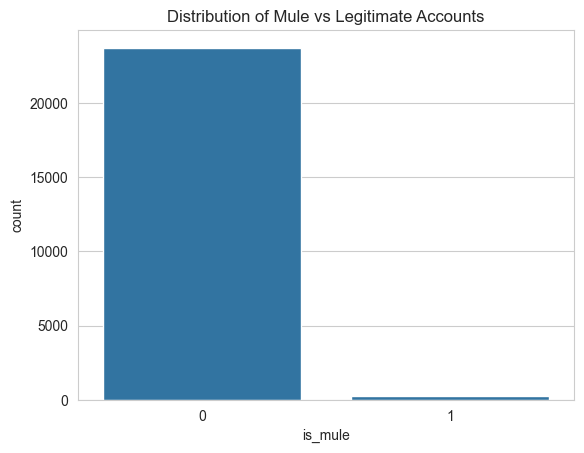

In [5]:
labels['is_mule'].value_counts()
labels['is_mule'].value_counts(normalize=True)
sns.countplot(x="is_mule", data=labels)
plt.title("Distribution of Mule vs Legitimate Accounts")
plt.show()


In [6]:
train = labels.merge(accounts, on="account_id", how="left")

train = train.merge(
    linkage,
    on="account_id",
    how="left"
)

train = train.merge(
    customers,
    on="customer_id",
    how="left"
)

train = train.merge(
    products,
    on="customer_id",
    how="left"
)

print(train.shape)


(24023, 50)


In [7]:
transactions['transaction_timestamp'] = pd.to_datetime(
    transactions['transaction_timestamp']
)
transactions['date'] = transactions['transaction_timestamp'].dt.date
transactions['hour'] = transactions['transaction_timestamp'].dt.hour
transactions['month'] = transactions['transaction_timestamp'].dt.month
transactions['year'] = transactions['transaction_timestamp'].dt.year


In [8]:
txn_features = transactions.groupby("account_id").agg(
    total_txn=("transaction_id","count"),
    total_amount=("amount","sum"),
    avg_amount=("amount","mean"),
    std_amount=("amount","std"),
    unique_counterparties=("counterparty_id","nunique"),
    active_days=("date","nunique")
).reset_index()
credit_debit = transactions.pivot_table(
    index="account_id",
    columns="txn_type",
    values="amount",
    aggfunc="count",
    fill_value=0
).reset_index()

credit_debit.columns = ["account_id","credit_txn","debit_txn"]
txn_features = txn_features.merge(
    credit_debit,
    on="account_id",
    how="left"
)


In [9]:
train = train.merge(
    txn_features,
    on="account_id",
    how="left"
)


In [10]:
train[['total_txn','avg_amount','unique_counterparties']].head()


,total_txn,avg_amount,unique_counterparties
0,10.0,4160.584000,9.0
1,162.0,7552.002469,13.0
2,4.0,2429.457500,3.0
3,72.0,21827.002361,38.0
4,1057.0,8603.859858,11.0


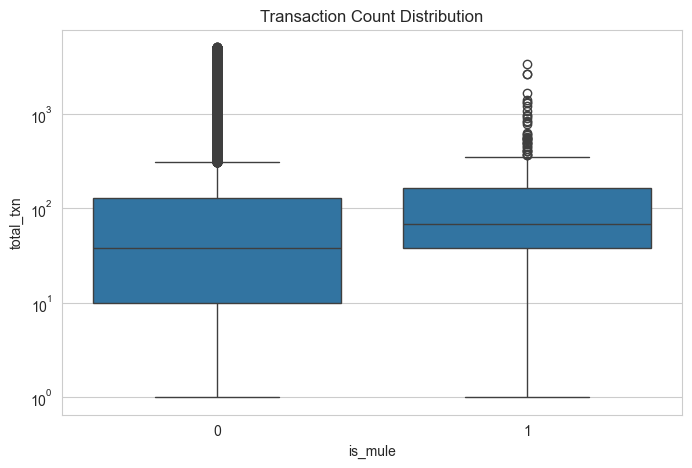

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x="is_mule", y="total_txn", data=train)
plt.yscale("log")
plt.title("Transaction Count Distribution")
plt.show()


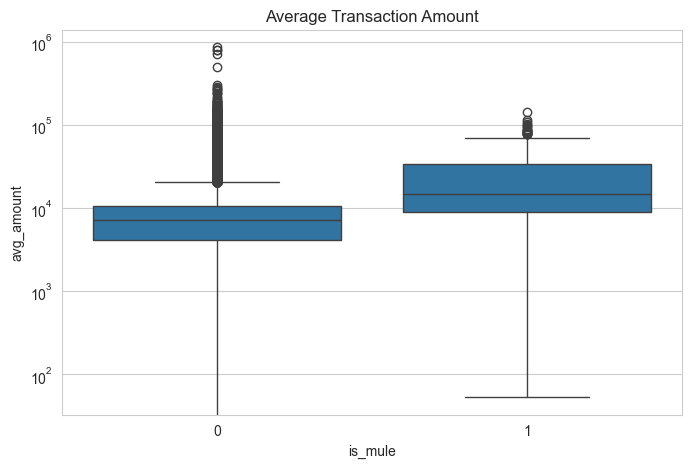

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x="is_mule", y="avg_amount", data=train)
plt.yscale("log")
plt.title("Average Transaction Amount")
plt.show()


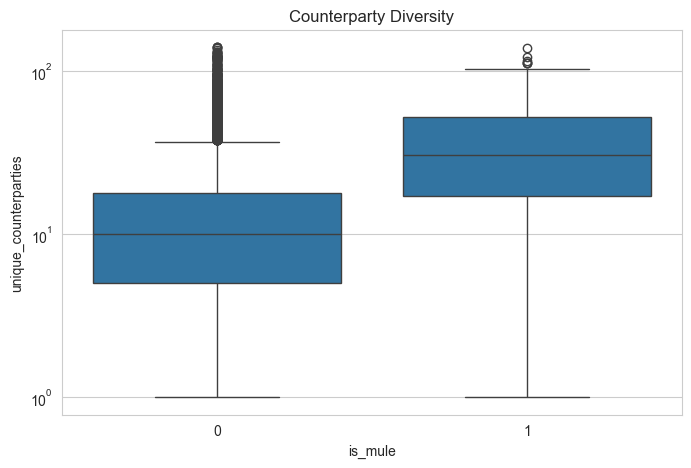

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="is_mule",
    y="unique_counterparties",
    data=train
)
plt.yscale("log")
plt.title("Counterparty Diversity")
plt.show()


In [14]:
print("Customers:", customers.shape)
print("Accounts:", accounts.shape)
print("Transactions:", transactions.shape)
print("Linkage:", linkage.shape)
print("Products:", products.shape)
print("Training Labels:", labels.shape)
print("Test Accounts:", test_accounts.shape)


Customers: (39988, 14)
Accounts: (40038, 22)
Transactions: (7424845, 12)
Linkage: (40038, 2)
Products: (39988, 11)
Training Labels: (24023, 5)
Test Accounts: (16015, 1)


In [15]:
labels['is_mule'].value_counts()
labels['is_mule'].value_counts(normalize=True)*100


is_mule
0    98.905216
1     1.094784
Name: proportion, dtype: float64

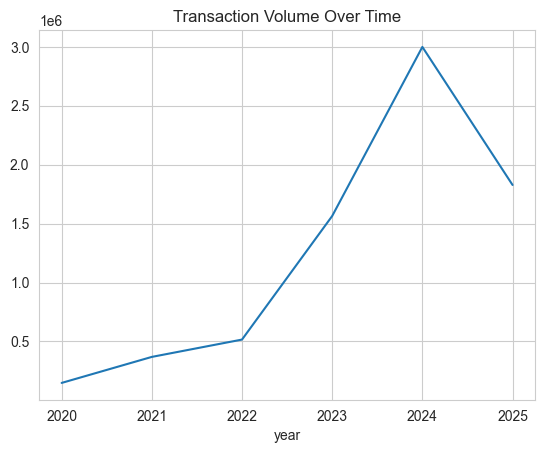

In [16]:
yearly = transactions.groupby("year").size()

yearly.plot(kind="line")
plt.title("Transaction Volume Over Time")
plt.show()


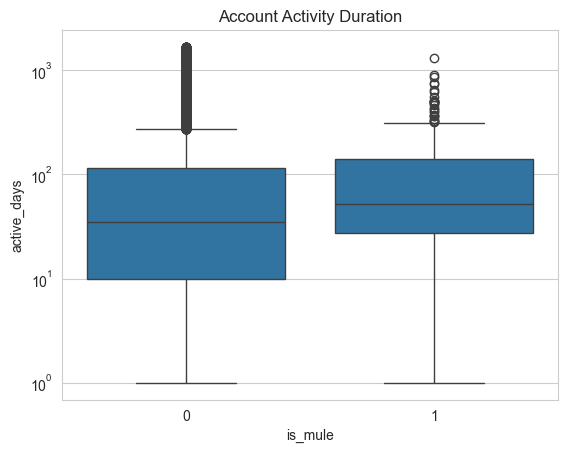

In [17]:
sns.boxplot(
    x="is_mule",
    y="active_days",
    data=train
)
plt.yscale("log")
plt.title("Account Activity Duration")
plt.show()


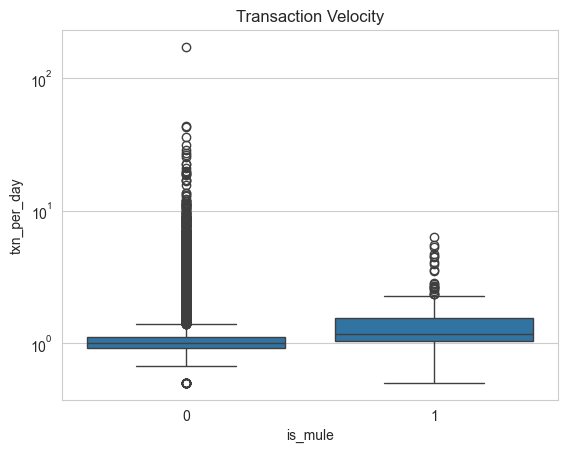

In [18]:
train["txn_per_day"] = (
    train["total_txn"] /
    (train["active_days"] + 1)
)
sns.boxplot(
    x="is_mule",
    y="txn_per_day",
    data=train
)
plt.yscale("log")
plt.title("Transaction Velocity")
plt.show()


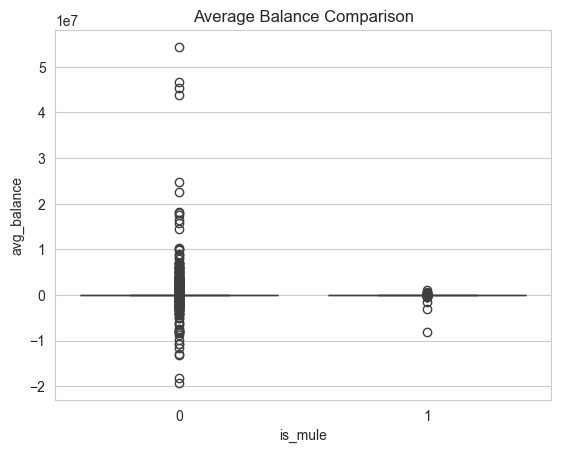

In [19]:
sns.boxplot(
    x="is_mule",
    y="avg_balance",
    data=train
)
plt.title("Average Balance Comparison")
plt.show()


In [20]:
pd.crosstab(train["kyc_compliant"], train["is_mule"])


is_mule,0,1
kyc_compliant,,
N,2375,22
Y,21385,241


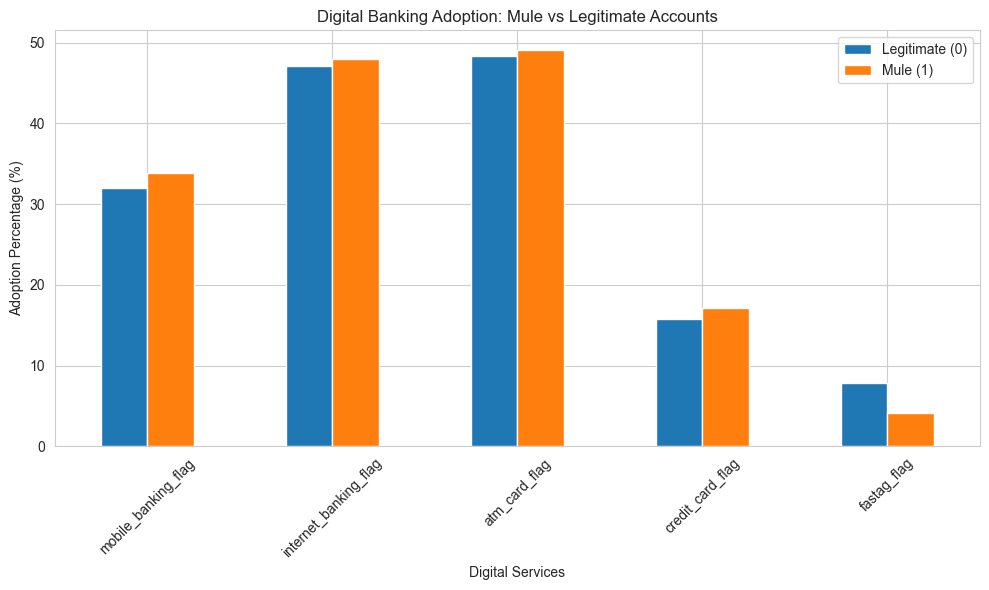

In [21]:
digital_cols = [
    "mobile_banking_flag",
    "internet_banking_flag",
    "atm_card_flag",
    "credit_card_flag",
    "fastag_flag"
]

for col in digital_cols:
    train[col] = train[col].map({"Y":1, "N":0})

digital_usage = train.groupby("is_mule")[digital_cols].mean()*100

digital_usage
digital_usage.T.plot(
    kind="bar",
    figsize=(10,6)
)

plt.title("Digital Banking Adoption: Mule vs Legitimate Accounts")
plt.ylabel("Adoption Percentage (%)")
plt.xlabel("Digital Services")
plt.xticks(rotation=45)
plt.legend(["Legitimate (0)", "Mule (1)"])
plt.tight_layout()
plt.show()


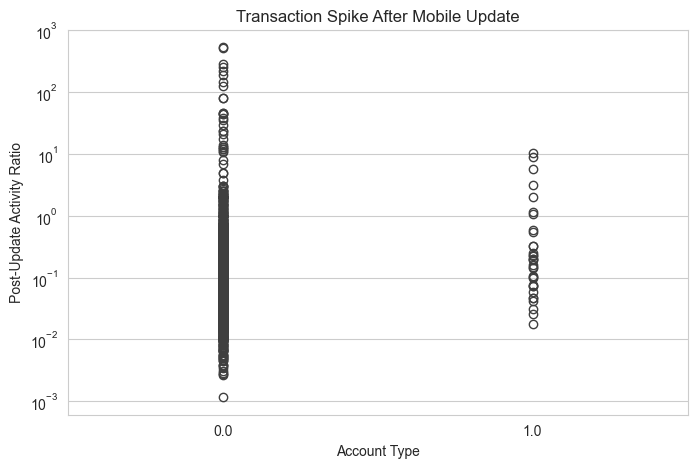

In [22]:
train["last_mobile_update_date"] = pd.to_datetime(
    train["last_mobile_update_date"],
    errors="coerce"
)

transactions["transaction_timestamp"] = pd.to_datetime(
    transactions["transaction_timestamp"]
)
txn_mobile = transactions.merge(
    train[["account_id","is_mule","last_mobile_update_date"]],
    on="account_id",
    how="left"
)
txn_mobile["after_mobile_update"] = (
    txn_mobile["transaction_timestamp"]
    > txn_mobile["last_mobile_update_date"]
)
mobile_spike = txn_mobile.groupby(
    ["account_id","is_mule","after_mobile_update"]
).size().reset_index(name="txn_count")
mobile_spike = mobile_spike.pivot_table(
    index=["account_id","is_mule"],
    columns="after_mobile_update",
    values="txn_count",
    fill_value=0
).reset_index()

mobile_spike.columns = [
    "account_id",
    "is_mule",
    "before_update",
    "after_update"
]
mobile_spike["spike_ratio"] = (
    mobile_spike["after_update"] /
    (mobile_spike["before_update"] + 1)
)
plt.figure(figsize=(8,5))

sns.boxplot(
    x="is_mule",
    y="spike_ratio",
    data=mobile_spike
)

plt.yscale("log")
plt.title("Transaction Spike After Mobile Update")
plt.xlabel("Account Type")
plt.ylabel("Post-Update Activity Ratio")
plt.show()

